Our task is to predict whether a bank currency note is authentic or not based upon four attributes of the note i.e. skewness of the wavelet transformed image, variance of the image, entropy of the image, and curtosis of the image. This is a binary classification problem and we will use SVM algorithm to solve this problem. Use different SVM kernels and find best classification accuracy

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC as svc
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv(r'D:\DigitalVidya\MachineLearning\Chapter8_SVM\SVM Assignment\bill_authentication.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


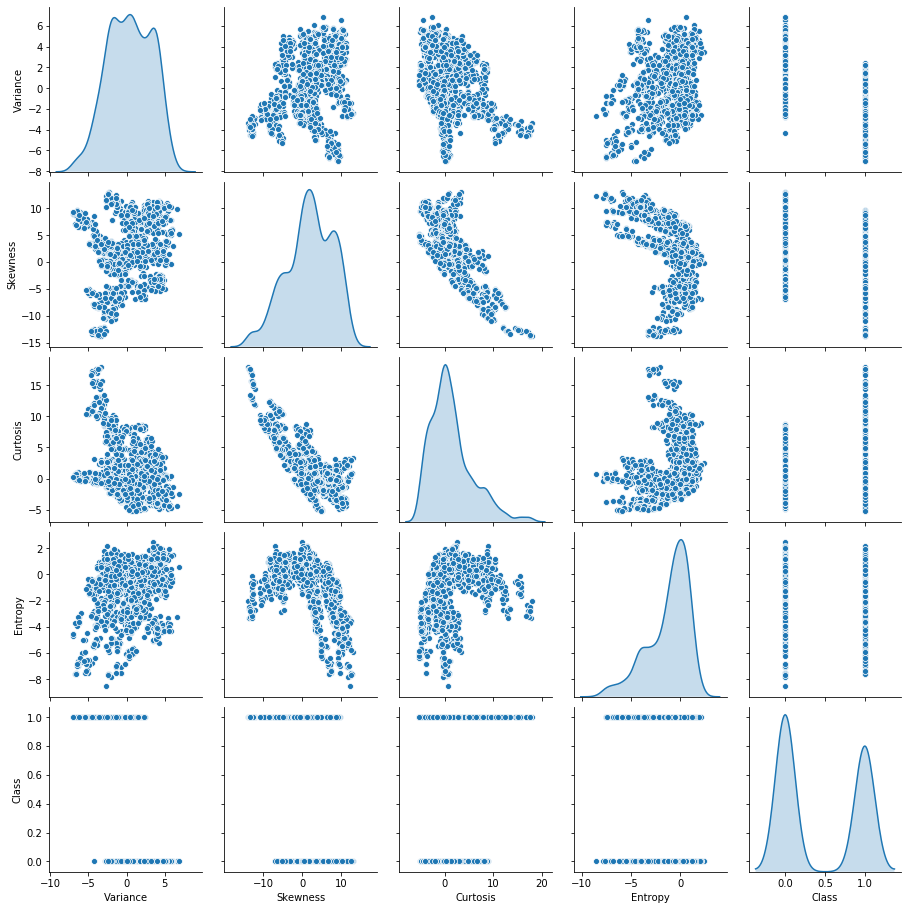

In [13]:
sns.pairplot(df,diag_kind = 'kde')

In [20]:
# plt.scatter(df['Variance'],df['Skewness'],c=['green'])

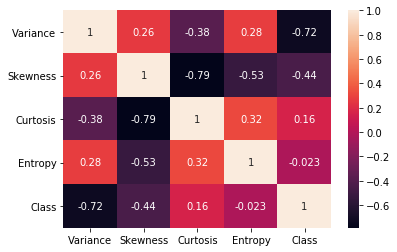

In [22]:
sns.heatmap(df.corr(),annot=True)

In [23]:
target = df['Class']

In [27]:
features = df.drop(['Class'],axis = 1)

In [28]:
features.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [29]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [31]:
X_train , X_test , Y_train , Y_test = train_test_split(features , target,random_state = 123,test_size=0.33)

In [34]:
svm =  svc(kernel ='linear',class_weight='balanced')

In [35]:
svm.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
result = svm.predict(X_test)

In [38]:
accuracy_score(Y_test,result)

0.9911699779249448

In [45]:
cf_matrix = confusion_matrix(Y_test,result)

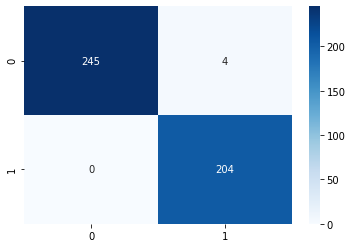

In [56]:
sns.heatmap(cf_matrix,annot=True,fmt='g', cmap='Blues')

In [52]:
print(classification_report(Y_test,result))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       249
           1       0.98      1.00      0.99       204

    accuracy                           0.99       453
   macro avg       0.99      0.99      0.99       453
weighted avg       0.99      0.99      0.99       453



In [54]:
roc_auc_score(Y_test,result)

0.9919678714859438

# Above metrics shows that with linear kernel, we are getting more than 99% accuracy to predict if the bank notes are authenticate or not

In [71]:
svm1 =  svc(kernel ='poly',class_weight='balanced',random_state=123)

In [72]:
svm1.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

In [73]:
result1 = svm1.predict(X_test)

In [74]:
accuracy_score(Y_test,result1)

0.9624724061810155

In [75]:
cf_matrix1 = confusion_matrix(Y_test,result1)

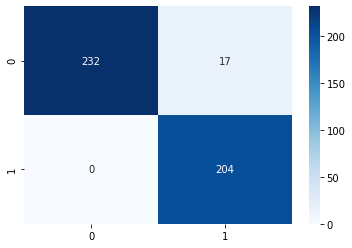

In [76]:
sns.heatmap(cf_matrix1,annot=True,fmt='g', cmap='Blues')

In [77]:
print(classification_report(Y_test,result1))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       249
           1       0.92      1.00      0.96       204

    accuracy                           0.96       453
   macro avg       0.96      0.97      0.96       453
weighted avg       0.97      0.96      0.96       453



In [78]:
roc_auc_score(Y_test,result1)

0.9658634538152611

# With kernal as polynomial, our accuracy dropped from 99 to 96%

In [79]:
svm2 =  svc(kernel ='sigmoid',class_weight='balanced',random_state=123)

In [80]:
svm2.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

In [81]:
result2 = svm2.predict(X_test)

In [82]:
accuracy_score(Y_test,result2)

0.6490066225165563

In [84]:
cf_matrix2 = confusion_matrix(Y_test,result2)

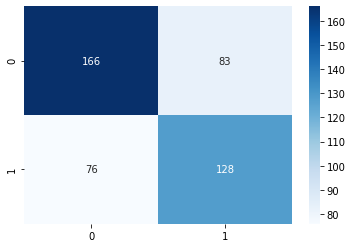

In [85]:
sns.heatmap(cf_matrix2,annot=True,fmt='g', cmap='Blues')

In [87]:
print(classification_report(Y_test,result2))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       249
           1       0.61      0.63      0.62       204

    accuracy                           0.65       453
   macro avg       0.65      0.65      0.65       453
weighted avg       0.65      0.65      0.65       453



In [88]:
roc_auc_score(Y_test,result2)

0.6470588235294118

# With sigmoid kernel, we further took a hit on accuracy which led to more mis classifications as can be seen from the confusion matrix

In [89]:
svm3 =  svc(class_weight='balanced',random_state=123)

In [90]:
svm3.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

In [91]:
result3 = svm3.predict(X_test)

In [92]:
accuracy_score(Y_test,result3)

0.9955849889624724

In [93]:
cf_matrix3 = confusion_matrix(Y_test,result3)

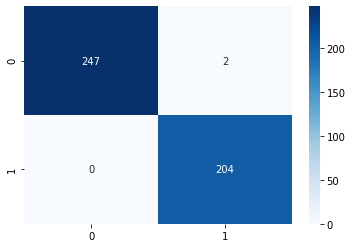

In [94]:
sns.heatmap(cf_matrix3,annot=True,fmt='g', cmap='Blues')

In [95]:
print(classification_report(Y_test,result3))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       249
           1       0.99      1.00      1.00       204

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453



In [96]:
roc_auc_score(Y_test,result3)

0.995983935742972

# Using rbf kernel increased our accuracy almost 50% from what we had for linear kernel. Our misclassification were only 2 in this case